#### Zmień nazwę notebooka na Nazwisko_Cw5.ipynb. Po ukończeniu zadania notebook prześlij na platformę.

In [3]:
import keras
import tensorflow as tf
keras.__version__
from numpy import genfromtxt
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pkt = 0

## Klasyfikacja binarna w Keras

W tym ćwczeniu zaimplementujesz sieć neuronową do rozwazywania problemu klasyfikacji binarnej. Na podstawie objawów zdrowotnych, które stanowić będą cechy modelu, sieć będzie klasyfikować nowych pacjentów na chorych bądź zdrowych.
Plik z danymi dotyczącymi chorób serca `heart.csv` zawiera następujące dane (cechy modelu) <br>
        1. wiek 
        2. płeć 
        3. rodzaj bólu w klatce piersiowej (4 wartości)
        4. ciśnienie w spoczynku 
        5. zawartość cholesterolu w surowicy mg/dl 
        6. cukier we krwi > 120 mg/dl
        7. spoczynkowe wyniki elektrokardiograficzne (wartości 0,1,2)
        8. maksymalne tętno
        9. dusznica indukowana wysiłkiem fizycznym 
        10. depresja ST wywołana ćwiczeniami w stosunku do odpoczynku 
        11. nachylenie szczytowego ćwiczenia odcinka ST
        12. liczba głównych naczyń (0-3) zabarwionych fluoroskopią 
        13. talasemia: 3 = w normie; 6 = defekt nieodwracalny; 7 = defekt odwracalny
        14. Etykieta: 0: zdrowy, 1: chory

Wczytujemy dane (format csv) oraz wypisujemy nagłówek pliku:

In [5]:
datapd = pd.read_csv("datasets/heart_cleveland_upload.csv")
m = datapd.shape[0]
n = datapd.shape[1]
print(('Ilosc danych m = %d, ilosc cech n = %d')%(m, n-1))
datapd.head()

Ilosc danych m = 297, ilosc cech n = 13


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:

from sklearn.model_selection import train_test_split
y = datapd["condition"]
X = datapd.drop(["condition"], axis=1)
#Podział na dane treningowe i testowe przeprowadzam po przygotowaniu donych pod algorytm
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
corr_matrix = datapd.corr()


In [8]:
corr_matrix["slope"].sort_values(ascending=False)
#slope/oldpeak
#wartości slope i oldpeak są ze sobą powiązane 

slope        1.000000
oldpeak      0.579037
condition    0.333049
thal         0.260096
exang        0.250572
age          0.159405
cp           0.151079
restecg      0.135141
trestbps     0.121172
ca           0.109761
fbs          0.047819
sex          0.033345
chol        -0.009215
thalach     -0.389307
Name: slope, dtype: float64

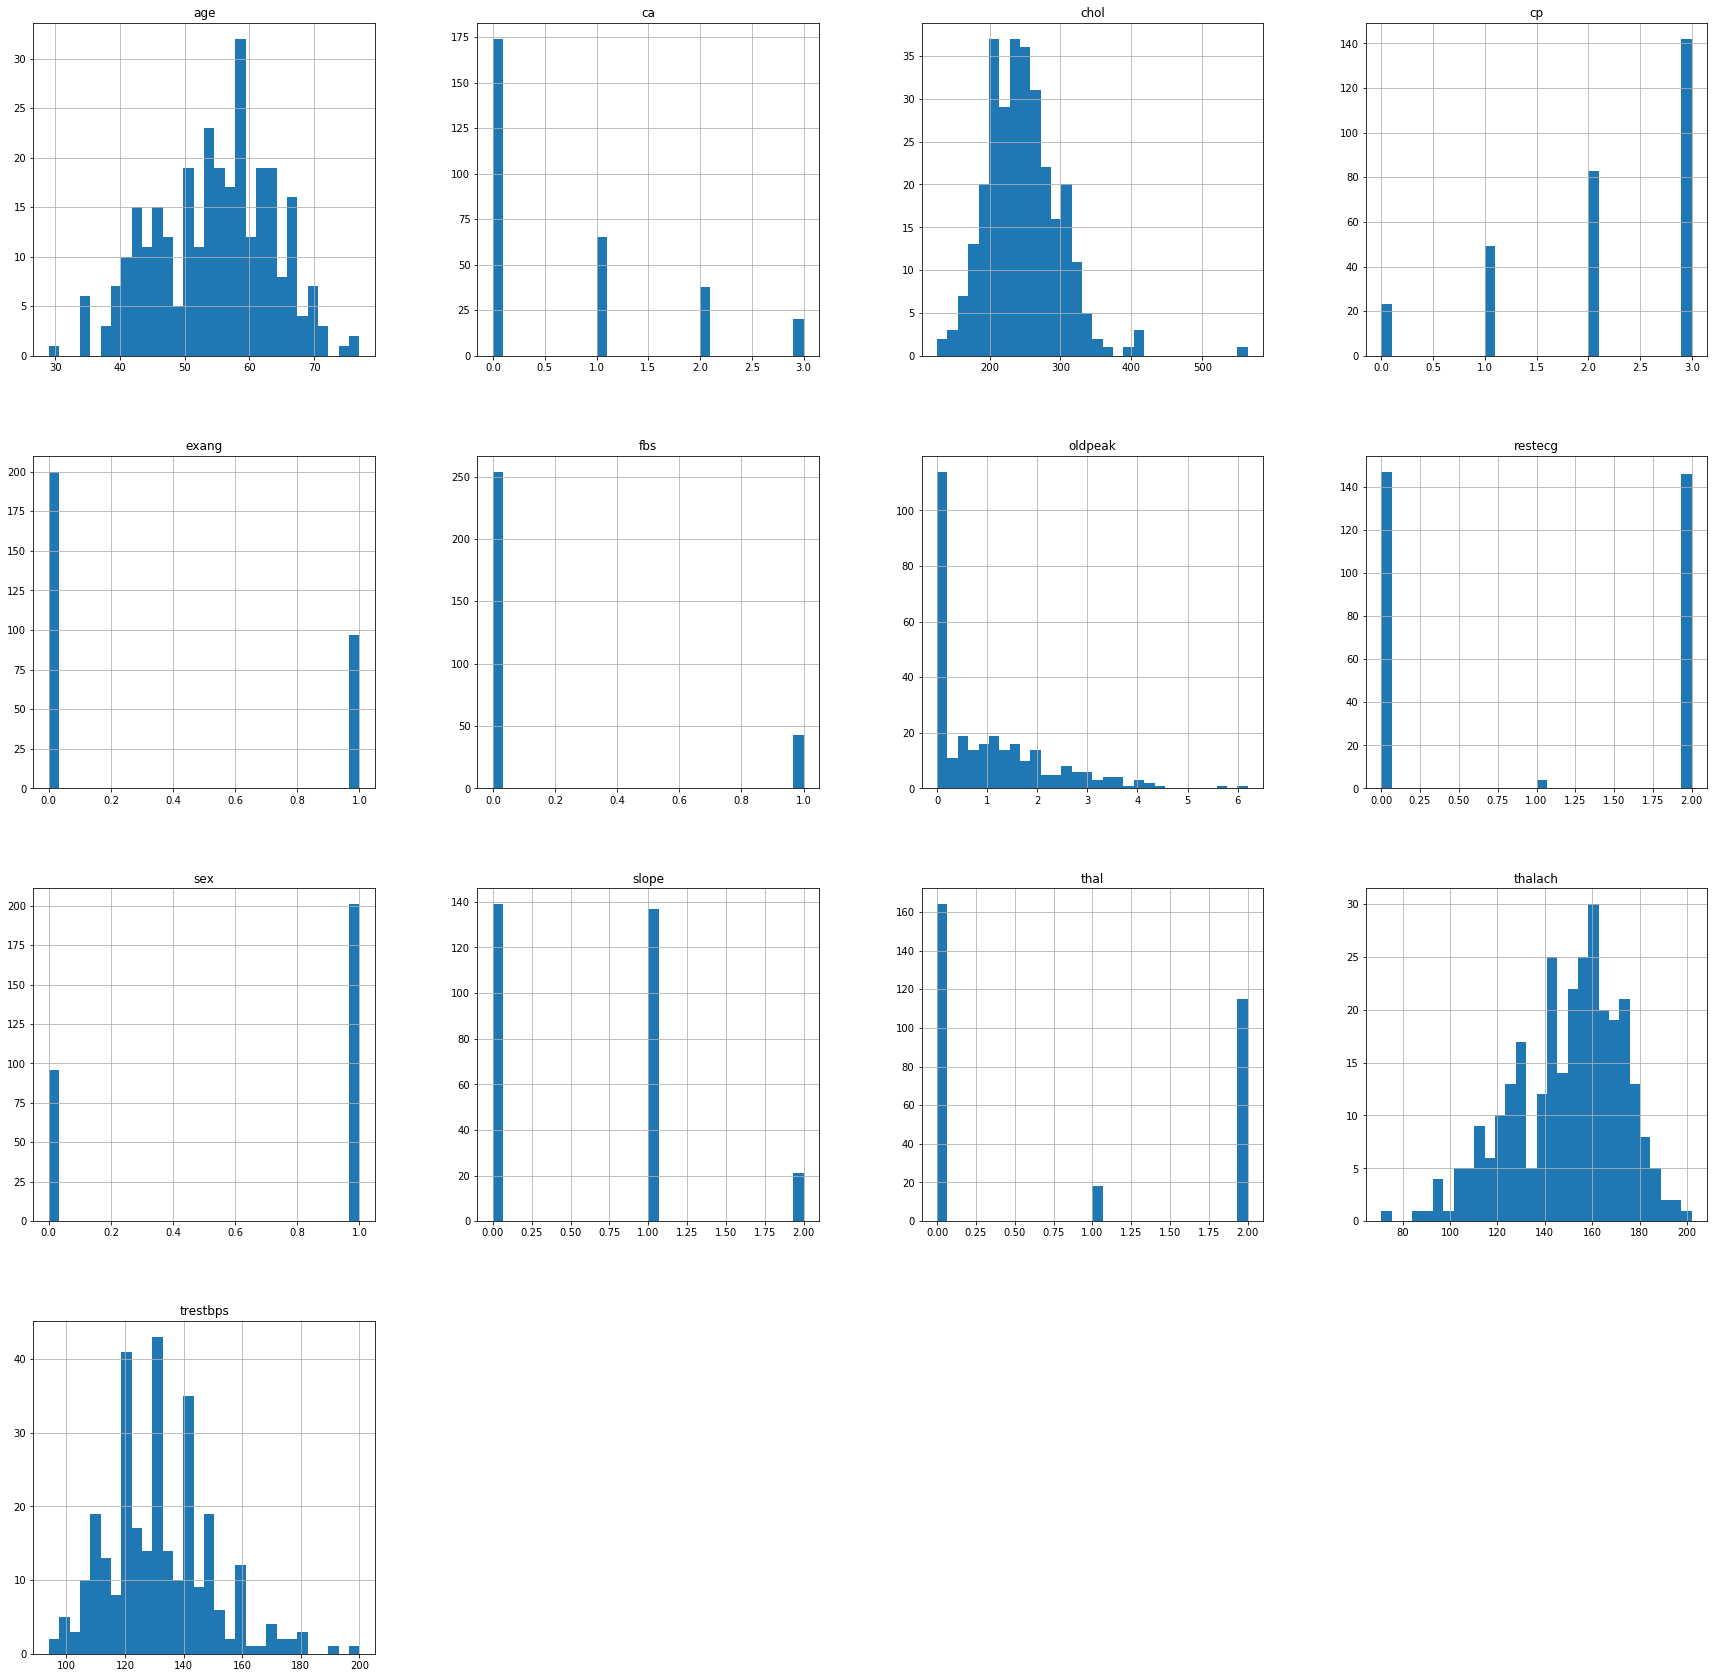

In [9]:

X.hist(bins=30, figsize=(30,30))
plt.show()

Target 1: zdrowy.
Target 0: chory.


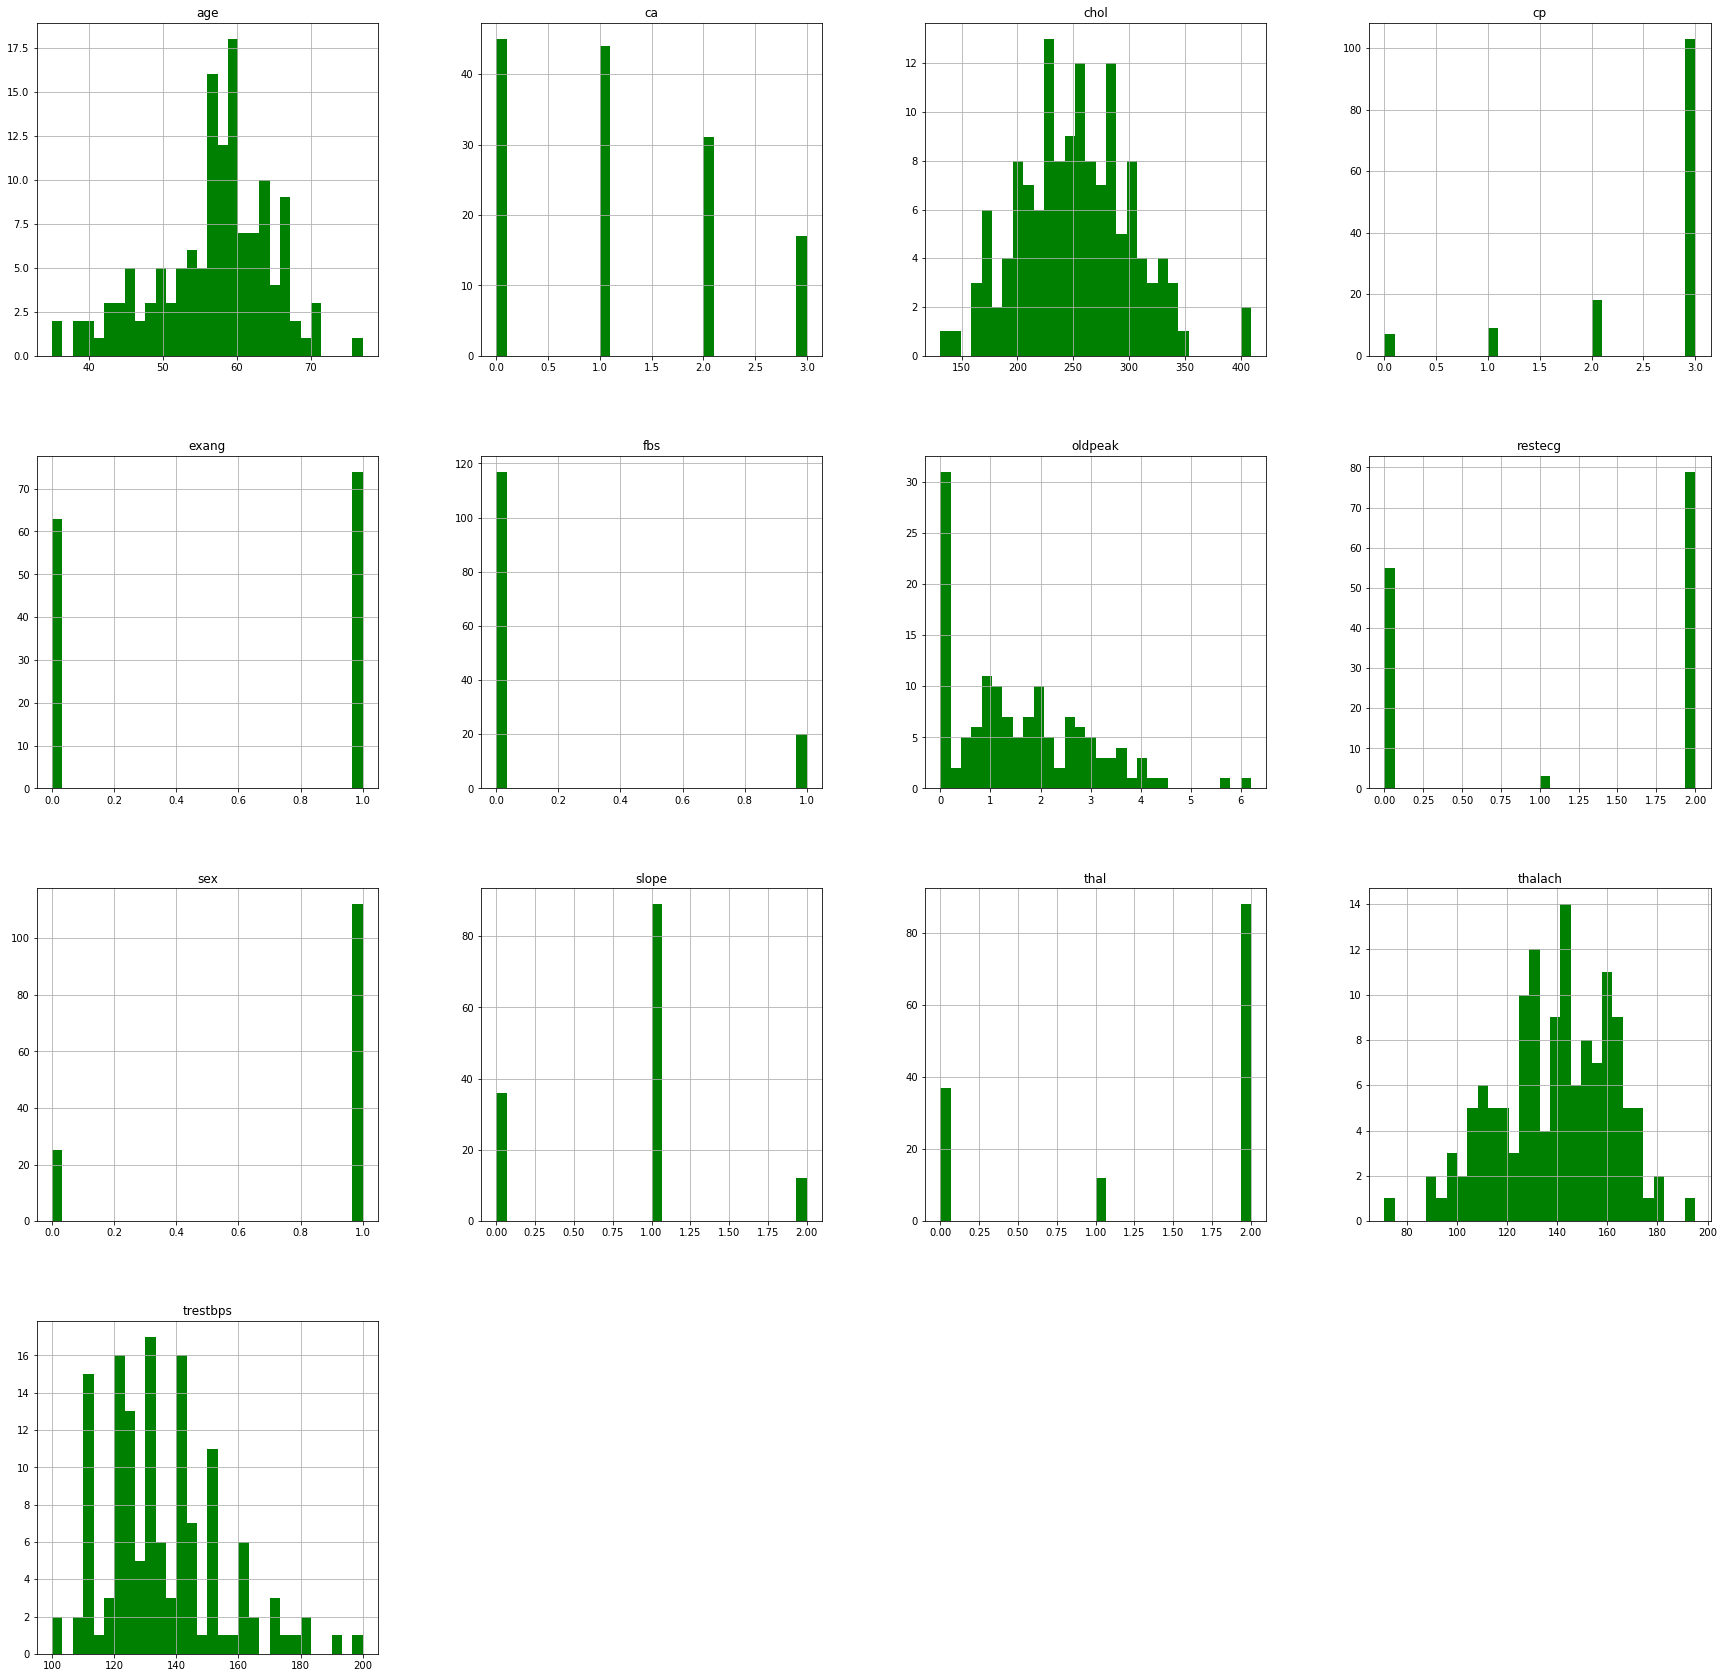

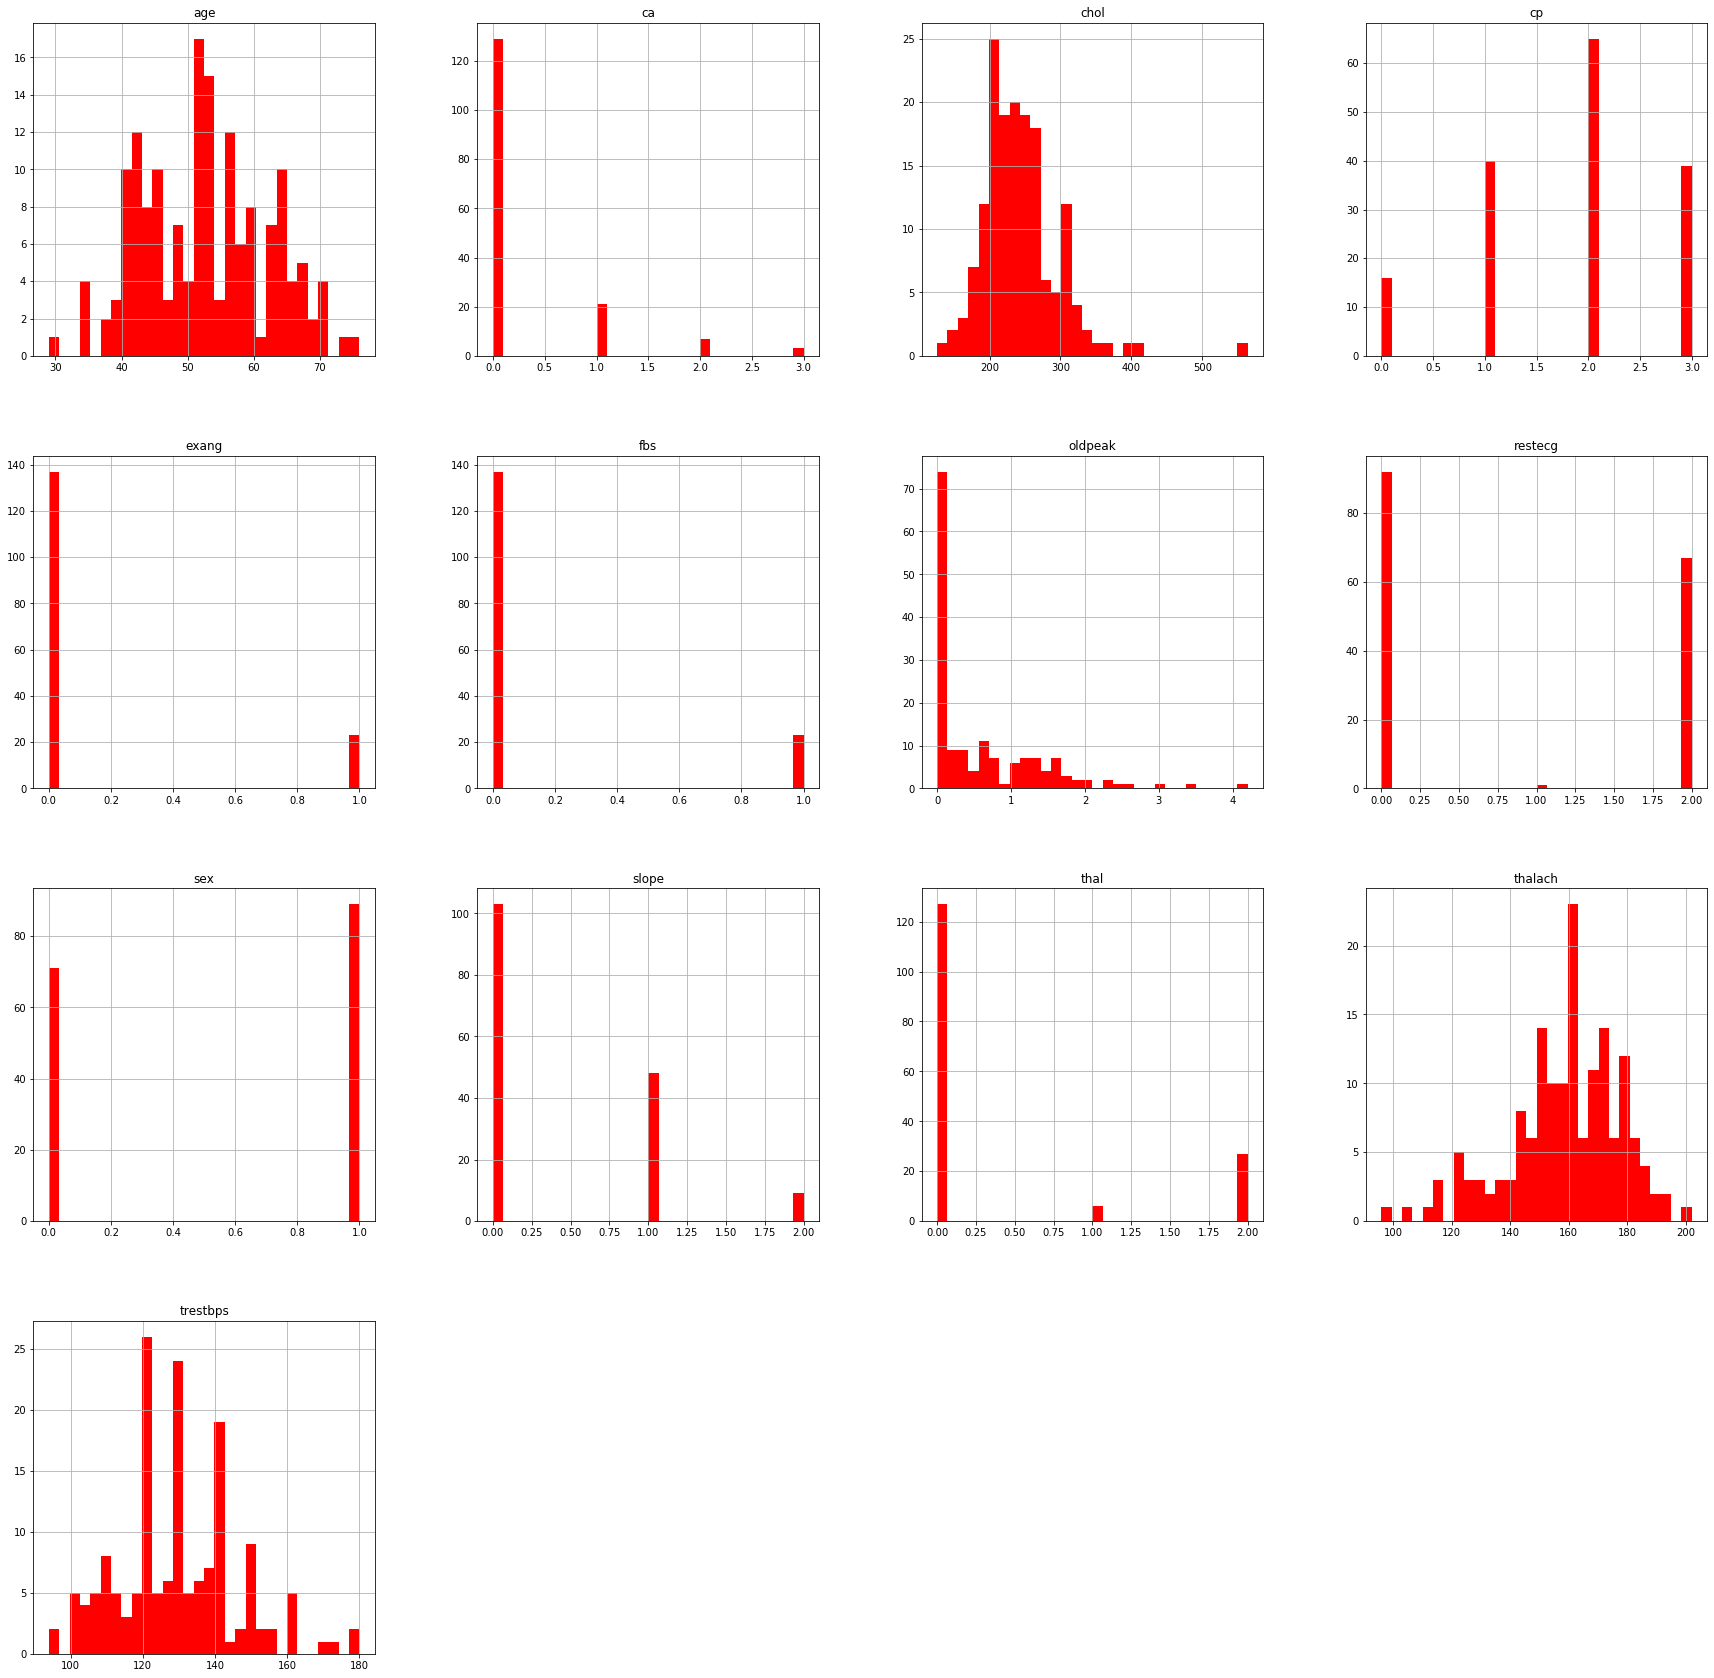

In [10]:

positive = datapd.loc[datapd["condition"] == 1]
negative = datapd.loc[datapd["condition"] == 0]
negative = negative.drop(["condition"], axis=1)
positive = positive.drop(["condition"], axis=1)
print("Target 1: zdrowy.")
positive.hist(bins=30, figsize=(30,30), color="green")
print("Target 0: chory.")
negative.hist(bins=30, figsize=(30,30), color="red")
plt.show()

4. Przygotuj dane treningowe w taki sposób, by można ich było użyć do trenowania sieci neronowej (-1pkt  za niewykonanie).

In [11]:

from keras.utils import to_categorical

def data_preparator(X,y):
    X["slope/oldpeak"] = X["slope"]/X["oldpeak"]
    slope_oldpeak = X["slope/oldpeak"].to_numpy()
    
    sex = X["sex"].to_numpy()
    cp = to_categorical(X["cp"])
    print("cp",cp[0])
    cp_0 = cp[:,0]
    cp_1 = cp[:,1]
    cp_2 = cp[:,2]
    cp_3 = cp[:,3]
    fbs = X["fbs"].to_numpy()
    restecg = to_categorical(X["restecg"])
    print("restecg",restecg[0])
    restecg_0 = restecg[:,0]
    restecg_1 = restecg[:,1]
    restecg_2 = restecg[:,2]
    exang = X["exang"].to_numpy()
    slope = to_categorical(X["slope"])
    print("slope",slope[0])
    slope_0 = slope[:,0]
    slope_1 = slope[:,1]
    slope_2 = slope[:,2]
    ca = to_categorical(X["ca"])
    print("ca",ca[0])
    ca_0 = ca[:,0]
    ca_1 = ca[:,1]
    ca_2 = ca[:,2]
    ca_3 = ca[:,3]
    thal = to_categorical(X["thal"])
    print("thal",thal[0])
    thal_0 = thal[:,0]
    thal_1 = thal[:,1]
    thal_2 = thal[:,2]
    
    X = X.to_numpy()
    y = y.to_numpy()
    
    max_slope_oldpeak = max(X[:,13])
    
    max_age = max(X[:, 0])
    age = X[:,0].astype("float32") / max_age
    max_trestbps = max(X[:, 3])
    trestbps = X[:,3].astype("float32") / max_trestbps
    max_thalach = max(X[:, 7])
    thalach = X[:,7].astype("float32") / max_thalach
    chol = (X[:,4] - np.mean(X[:,4]))/np.std(X[:,4])
    max_oldpeak = max(X[:, 9])
    oldpeak = X[:,9].astype("float32") / max_oldpeak
    X = np.array([age,sex,cp_0,cp_1,cp_2,cp_3,trestbps,chol,fbs,restecg_0,restecg_1,restecg_2,
                        thalach,exang,oldpeak,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,
                        thal_0,thal_1,thal_2])
    X = X.T
    y = to_categorical(y)
    
    return X,y

In [12]:
X, y = data_preparator(X, y)

cp [1. 0. 0. 0.]
restecg [0. 0. 1.]
slope [0. 1. 0.]
ca [0. 1. 0. 0.]
thal [1. 0. 0.]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [14]:
print(X_train[0])
print(y_test[0])

[ 0.76623374  1.          0.          0.          0.          1.
  0.55000001 -0.16085866  0.          0.          0.          1.
  0.70297033  1.          0.1935484   0.          1.          0.
  0.          1.          0.          0.          0.          0.
  1.        ]
[0. 1.]


In [19]:
print(X_train.shape)

(252, 25)


In [20]:

from keras import models
from keras import layers
from keras import regularizers

def build_model(dropout_rate = 0.25, lr = 0.01, neurons_number = 512, reg = 0.001):
    network = models.Sequential()
    network.add(layers.Dense(neurons_number,activation="relu",input_shape=(25,)))
    network.add(layers.Dropout(rate=dropout_rate))
    network.add(layers.Dense(neurons_number,activation="relu"))
    network.add(layers.Dropout(rate=dropout_rate))
    network.add(layers.Dense(neurons_number,activation="relu"))
    network.add(layers.Dropout(rate=dropout_rate))
    network.add(layers.Dense(2,activation="sigmoid"))
    
    opt = keras.optimizers.Adamax(learning_rate=lr, beta_1=0.9, beta_2=0.999)
    network.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])
    
    return network

In [21]:
k = 4
num_val_samples = len(X_train) // k
num_epochs = 9
lr = 0.001
dropout_rate = 0.24
reg = 0.01
batch_size = 110
neurons_number = 200
all_val_acc = []
all_train_acc = []
all_val_loss = []
all_train_loss = []
subsets_of_X = []
subsets_of_y = []
start = 0
stop = len(X_train) // k
all_acc_histories = []
for i in range(k):
    Xsubset = X_train[start:stop]
    ysubset = y_train[start:stop]
    start += num_val_samples
    stop += num_val_samples
    subsets_of_X.append(Xsubset)
    subsets_of_y.append(ysubset)

for i in range(k):
    print('skladowa nr', i)
    val_X = subsets_of_X[i]
    val_y = subsets_of_y[i]
    
    indexes = [x for x in range(k) if x != i]
    train_X = subsets_of_X[indexes[0]]
    train_y = subsets_of_y[indexes[0]]
    for j in range(1,len(indexes)):
        train_X = np.concatenate((train_X,subsets_of_X[indexes[j]]))
        train_y = np.concatenate((train_y,subsets_of_y[indexes[j]]))
    
    model = build_model(dropout_rate = dropout_rate, lr = lr, neurons_number = neurons_number, reg = reg)
    

    history = model.fit(train_X, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(val_X,val_y),verbose = 0)
    
    results = model.evaluate(val_X, val_y, verbose=0)
    all_val_loss.append(history.history['val_loss'])
    all_val_acc.append(history.history['val_accuracy'])
    train_acc_history = history.history['accuracy']
    train_loss_history = history.history['loss']
    all_train_acc.append(train_acc_history)
    all_train_loss.append(train_loss_history)

skladowa nr 0

skladowa nr 1
skladowa nr 2
skladowa nr 3


In [22]:

all_val_acc = np.array(all_val_acc)
val_acc = np.sum(all_val_acc, axis=0) / k
print(val_acc)

[0.66071428 0.75992063 0.78174603 0.79365081 0.81547618 0.82142858
 0.82738094 0.83333334 0.83134921]


In [23]:
all_val_loss = np.array(all_val_loss)
val_loss = sum(all_val_loss)/k
print(val_loss)

[0.66710086 0.64311838 0.61997864 0.59697986 0.57293688 0.54811966
 0.52328414 0.49777588 0.47263166]


In [24]:
all_train_acc = np.array(all_train_acc)
train_acc = np.sum(all_train_acc, axis=0) / k
print(train_acc)

[0.49801588 0.65873015 0.73941797 0.74867725 0.76521164 0.8002646
 0.8048942  0.8201058  0.84391534]


In [25]:
all_train_loss = np.array(all_train_loss)
train_loss = np.sum(all_train_loss, axis=0) / k
print(train_loss)

[0.6961218  0.66260812 0.63880331 0.62595252 0.5994933  0.57944182
 0.55773856 0.52653483 0.50297209]


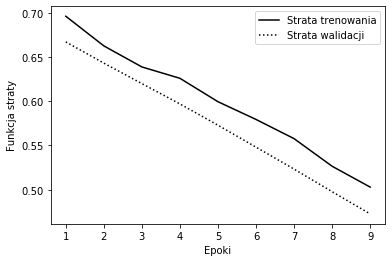

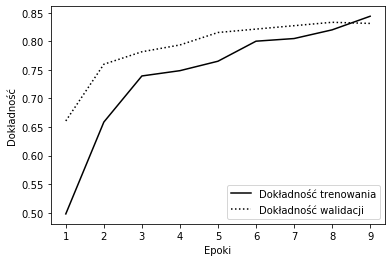

In [26]:
epochs = [x for x in range(1,num_epochs+1)]
fig, ax = plt.subplots()
ax.plot(epochs, train_loss, 'k', label='Strata trenowania')
ax.plot(epochs, val_loss, 'k:', label='Strata walidacji')
plt.xlabel("Epoki")
plt.ylabel("Funkcja straty")
legend = ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(epochs, train_acc, 'k', label='Dokładność trenowania')
ax.plot(epochs, val_acc, 'k:', label='Dokładność walidacji')
plt.xlabel("Epoki")
plt.ylabel("Dokładność")
legend = ax.legend()
plt.show()

Epoch 1/9
189/189 [==============================] - 1s 3ms/step - loss: 0.6845 - accuracy: 0.5741
Epoch 2/9
189/189 [==============================] - 0s 103us/step - loss: 0.6461 - accuracy: 0.7354
Epoch 3/9
189/189 [==============================] - 0s 109us/step - loss: 0.6091 - accuracy: 0.7884
Epoch 4/9
189/189 [==============================] - 0s 89us/step - loss: 0.5808 - accuracy: 0.8175
Epoch 5/9
189/189 [==============================] - 0s 89us/step - loss: 0.5574 - accuracy: 0.8280
Epoch 6/9
189/189 [==============================] - 0s 88us/step - loss: 0.5287 - accuracy: 0.8175
Epoch 7/9
189/189 [==============================] - 0s 90us/step - loss: 0.4990 - accuracy: 0.8307
Epoch 8/9
189/189 [==============================] - 0s 91us/step - loss: 0.4800 - accuracy: 0.8254
Epoch 9/9
189/189 [==============================] - 0s 144us/step - loss: 0.4700 - accuracy: 0.8360


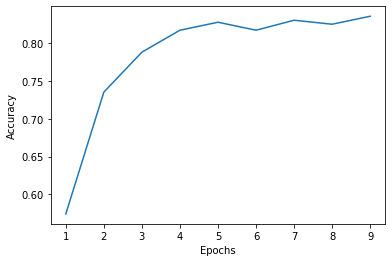

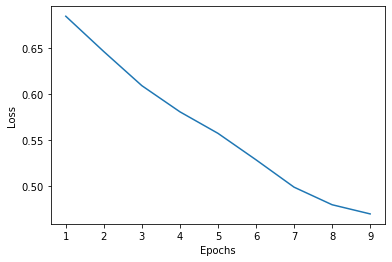

81.11110925674438 0.45705312490463257


8.111110925674438

In [28]:

model = build_model(dropout_rate = dropout_rate, lr = lr, neurons_number = neurons_number, reg = reg)
history = model.fit(train_X, train_y, epochs=num_epochs, batch_size=batch_size)

history_dict = history.history
train_loss = history_dict["loss"]
train_accuracy = history_dict["accuracy"]

plt.plot(epochs,train_accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.plot(epochs,train_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

results = model.evaluate(X_test, y_test, verbose=0)
test_acc = results[1]*100
test_loss = results[0]
print(test_acc,test_loss)
pkt = pkt + (test_acc*0.1)
pkt

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
predictions = model.predict_classes(X_test)
def one_hot_to_classes(y):
    y_classes = []
    for i in range(45):
        if y[i][0] == 0:
            y_classes.append(1)
        else:
            y_classes.append(0)
    y_classes = np.array(y_classes)
    return y_classes
predictions.shape

(45,)

In [31]:
y_test_classes = one_hot_to_classes(y_test)
a = confusion_matrix(y_test_classes,predictions)
a

array([[20,  6],
       [ 2, 17]])

In [32]:
pn = a[0][0]
fp = a[0][1]
fn = a[1][0]
pp = a[1][1]

precyzja = pp/(pp+fp)
pelnosc = pp/(pp+fn)
print("Precyzja wynosi:",precyzja)
print("Pełność wynosi:",pelnosc)

Precyzja wynosi: 0.7391304347826086
Pełność wynosi: 0.8947368421052632
